# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import LabelEncoder

# Data Reading and Cleaning

In [2]:
streamflow_df = pd.read_csv('https://raw.githubusercontent.com/selvinfurtado01/data_projects/main/streamFlow_subscription_data.csv')
streamflow_df.head(10)

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN
5,6,25,Other,South,2023-10-26 01:53:37.657028,Basic,9.99,PayPal,6.046944,Drama,Tablet,2.336847,1072,5,0,NaN,NaN
6,7,38,Female,Central,2021-02-06 01:53:37.657039,Basic,9.99,Direct Debit,69.876742,Comedy,TV,1.445445,1056,4,0,NaN,NaN
7,8,56,Female,North,2023-05-26 01:53:37.657051,Basic,9.99,Credit Card,26.538526,Drama,TV,0.446673,1097,4,0,NaN,NaN
8,9,36,Male,East,2021-09-29 01:53:37.657064,Standard,14.99,Credit Card,24.052576,Drama,PC,0.770118,1036,2,0,NaN,NaN
9,10,40,Female,West,2020-07-22 01:53:37.657075,Basic,9.99,PayPal,38.336441,Drama,TV,1.792035,1047,4,0,NaN,NaN


In [3]:
streamflow_df.dtypes

User_ID                      int64
Age                          int64
Gender                      object
Location                    object
Subscription_Start_Date     object
Subscription_Type           object
Monthly_Payment            float64
Payment_Method              object
Monthly_Hours_Watched      float64
Favorite_Genre              object
Devices_Used                object
Average_Session_Length     float64
Content_ID                   int64
Rating_Given                 int64
Churned                      int64
Date_of_Churn               object
Reason_for_Churn            object
dtype: object

In [4]:
streamflow_df.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


In [5]:
# Checking Data for null values
streamflow_df.isna().sum()

User_ID                      0
Age                          0
Gender                       0
Location                     0
Subscription_Start_Date      0
Subscription_Type            0
Monthly_Payment              0
Payment_Method               0
Monthly_Hours_Watched        0
Favorite_Genre               0
Devices_Used                 0
Average_Session_Length       0
Content_ID                   0
Rating_Given                 0
Churned                      0
Date_of_Churn              754
Reason_for_Churn           754
dtype: int64

In [6]:
#Converting to Objects to Date(Subscription_Start_Date, Date_of_Churn)

streamflow_df['Subscription_Start_Date'] = pd.to_datetime(streamflow_df['Subscription_Start_Date'])
streamflow_df['Subscription_Start_Date'] = streamflow_df['Subscription_Start_Date'].dt.date

streamflow_df['Date_of_Churn'] = pd.to_datetime(streamflow_df['Date_of_Churn'])
streamflow_df['Date_of_Churn'] = streamflow_df['Date_of_Churn'].dt.date

In [7]:
# Identifying a large set of null values in the columns(Churned, Date_of_Churn, Reason_for_Churn)
streamflow_df.iloc[:,14:17]

,Churned,Date_of_Churn,Reason_for_Churn
0,0,NaT,NaN
1,0,NaT,NaN
2,0,NaT,NaN
3,0,NaT,NaN
4,0,NaT,NaN
...,...,...,...
995,1,2021-03-14,Found better service
996,0,NaT,NaN
997,0,NaT,NaN
998,1,2021-04-05,Found better service


In [8]:
# Not deleting or changing values as null values realted to Not-Churned Users
# Displaying dataframe of Churned Users
streamflow_df[streamflow_df['Churned'] == 1]

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
12,13,41,Other,North,2021-04-22,Standard,14.99,Direct Debit,14.011035,Sci-Fi,Mobile,0.152133,1059,5,1,2021-06-13,Found better service
13,14,70,Other,South,2020-10-29,Standard,14.99,Direct Debit,35.339461,Sci-Fi,Mobile,3.346005,1011,2,1,2021-03-11,Found better service
14,15,53,Other,East,2023-10-06,Standard,14.99,Credit Card,14.191293,Documentary,Mobile,2.791956,1020,1,1,2024-07-02,Price increase
16,17,41,Other,South,2019-07-27,Premium,19.99,Credit Card,12.991876,Drama,Mobile,2.519855,1043,1,1,2020-03-16,Found better service
29,30,39,Male,North,2019-11-05,Standard,14.99,Credit Card,22.258651,Comedy,Mobile,0.838116,1034,2,1,2020-08-13,Price increase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,984,26,Male,Central,2021-10-06,Basic,9.99,Direct Debit,5.586560,Sci-Fi,PC,3.773253,1025,5,1,2022-05-30,Found better service
991,992,34,Female,Central,2019-10-04,Standard,14.99,PayPal,13.864300,Drama,PC,0.500756,1003,3,1,2019-11-09,Personal reasons
992,993,43,Female,East,2021-01-26,Premium,19.99,Credit Card,2.735002,Action,Mobile,0.070838,1099,1,1,2021-10-24,Personal reasons
995,996,25,Other,East,2020-10-26,Basic,9.99,PayPal,0.700179,Documentary,Mobile,3.310731,1035,1,1,2021-03-14,Found better service


In [9]:
# Validating the null values in the same columns for churned dataframe (Churned, Date_of_Churn, Reason_for_Churn)
streamflow_df[streamflow_df['Churned'] == 1].iloc[:,14:17]

,Churned,Date_of_Churn,Reason_for_Churn
12,1,2021-06-13,Found better service
13,1,2021-03-11,Found better service
14,1,2024-07-02,Price increase
16,1,2020-03-16,Found better service
29,1,2020-08-13,Price increase
...,...,...,...
983,1,2022-05-30,Found better service
991,1,2019-11-09,Personal reasons
992,1,2021-10-24,Personal reasons
995,1,2021-03-14,Found better service


In [10]:
churned_df = streamflow_df[streamflow_df['Churned'] == 1]

In [11]:
# Describing data for the Churned Dataframe
churned_df.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.0
mean,505.361789,43.174797,14.502195,17.039672,1.920114,1050.443089,2.593496,1.0
std,284.676765,15.507139,3.494289,17.236483,1.841691,30.536877,1.273513,0.0
min,13.000000,18.000000,9.990000,0.041574,0.000821,1000.000000,1.000000,1.0
25%,273.250000,30.000000,9.990000,5.105890,0.641881,1022.250000,2.000000,1.0
50%,501.500000,41.000000,14.990000,11.948593,1.277379,1050.000000,2.000000,1.0
75%,752.250000,56.000000,14.990000,23.618435,2.704228,1077.750000,3.000000,1.0
max,999.000000,70.000000,19.990000,108.122364,11.417557,1099.000000,5.000000,1.0


# Data Analysis

Total Users: 1000
Churned Users: 246
Churned Users Percentage: 24.6%


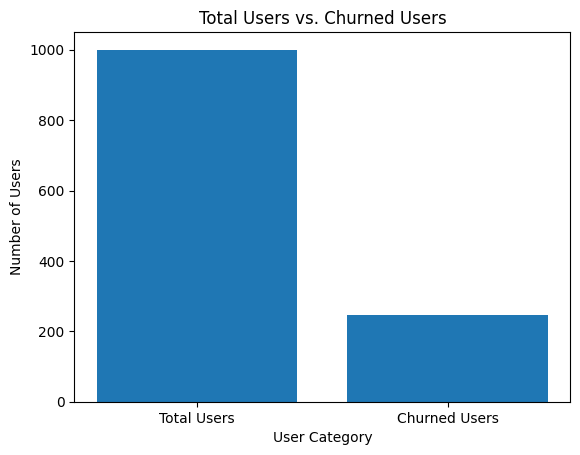

In [12]:
# Identifying Total Users vs Churned Users 

total_users = streamflow_df['User_ID'].count()
churned_users = streamflow_df[streamflow_df['Churned'] == 1].count()

print('Total Users:', total_users)
print('Churned Users:', churned_users['User_ID'])

churned_users_percentage = churned_users['User_ID'] * 100 / total_users
print('Churned Users Percentage: {}%'.format(churned_users_percentage))

user_categories = ['Total Users', 'Churned Users']
user_counts = [total_users, churned_users['User_ID']]

plt.bar(user_categories, user_counts)

plt.xlabel("User Category")
plt.ylabel("Number of Users")
plt.title("Total Users vs. Churned Users")

plt.show()

In [13]:
# Printing Different Values for Churning to better understand the data
streamflow_df['Reason_for_Churn'].unique()

array([nan, 'Found better service', 'Price increase',
       'Dissatisfied with content', 'Personal reasons'], dtype=object)

In [14]:
streamflow_df[streamflow_df['Reason_for_Churn'] == 'Price increase'][['Devices_Used', 'Subscription_Type','Monthly_Payment','Reason_for_Churn']]

,Devices_Used,Subscription_Type,Monthly_Payment,Reason_for_Churn
14,Mobile,Standard,14.99,Price increase
29,Mobile,Standard,14.99,Price increase
54,Tablet,Basic,9.99,Price increase
57,Mobile,Standard,14.99,Price increase
60,Tablet,Standard,14.99,Price increase
...,...,...,...,...
931,Tablet,Standard,14.99,Price increase
946,Tablet,Premium,19.99,Price increase
966,Mobile,Basic,9.99,Price increase
969,Mobile,Basic,9.99,Price increase


Reason_for_Churn
Dissatisfied with content    13.740000
Found better service         14.599375
Personal reasons             14.264194
Price increase               15.210588
Name: Monthly_Payment, dtype: float64


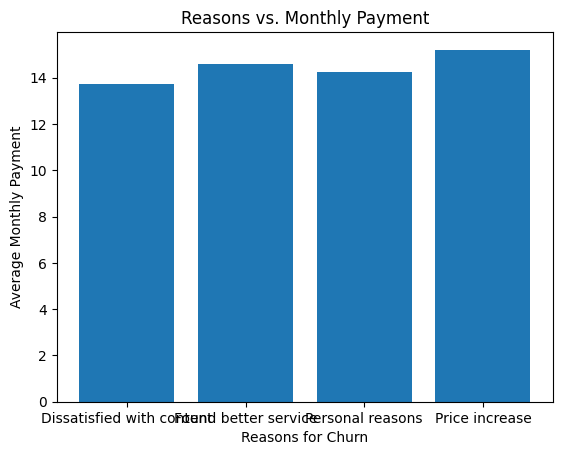

In [15]:
# Average Monthly payment across different reasons identified

average_payment = churned_df.groupby('Reason_for_Churn')['Monthly_Payment'].mean()
print(average_payment)

reasons_categories = ['Dissatisfied with content', 'Found better service', 'Personal reasons', 'Price increase']
plt.bar(reasons_categories, height = average_payment)

plt.xlabel("Reasons for Churn")
plt.ylabel("Average Monthly Payment")
plt.title("Reasons vs. Monthly Payment")

plt.show()

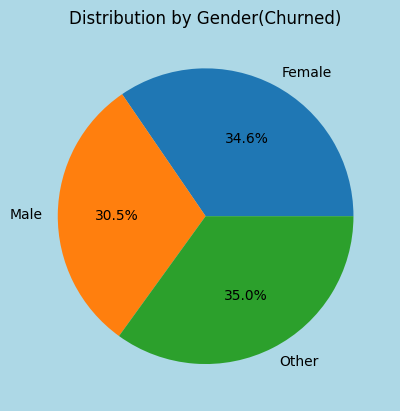

In [16]:
#Gender Distribution for Churned Users

gender = churned_df.groupby('Gender')['Reason_for_Churn'].count()

plt.pie(gender, labels=gender.index, autopct="%1.1f%%")

plt.title("Distribution by Gender(Churned)")
plt.gcf().set_facecolor('lightblue')
plt.show()

Reason_for_Churn
Dissatisfied with content    52
Found better service         64
Personal reasons             62
Price increase               68
Name: Subscription_Type, dtype: int64


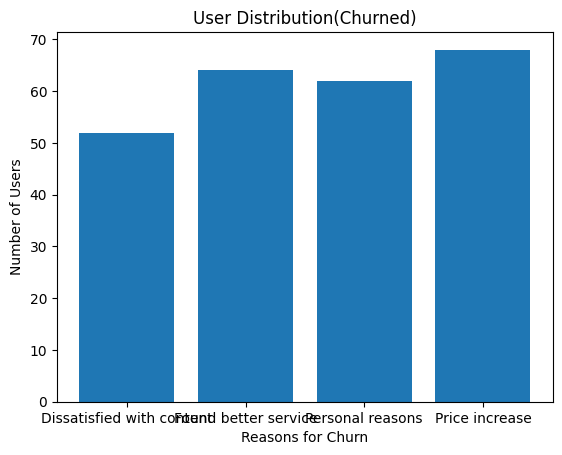

In [17]:
#Number of Churned users(Reasons) 

churn_reason = churned_df.groupby('Reason_for_Churn')['Subscription_Type'].count()
print(churn_reason)

reasons_categories = ['Dissatisfied with content', 'Found better service', 'Personal reasons', 'Price increase']
plt.bar(reasons_categories, height = churn_reason)

plt.xlabel("Reasons for Churn")
plt.ylabel("Number of Users")
plt.title("User Distribution(Churned)")

plt.show()

In [18]:
# Subscription Type for Reason (Price increase)

churned_df[churned_df['Reason_for_Churn'] == 'Price increase'].groupby('Subscription_Type')['User_ID'].count()

Subscription_Type
Basic       15
Premium     18
Standard    35
Name: User_ID, dtype: int64

Devices_Used
Mobile    32
PC        10
TV         9
Tablet    17
Name: User_ID, dtype: int64


<Axes: xlabel='Devices_Used'>

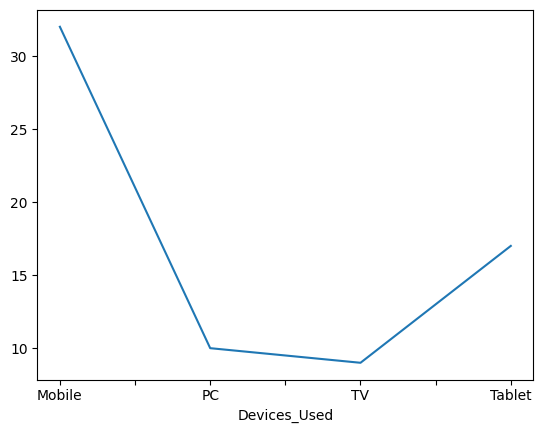

In [19]:
# Devices Used for Reason (Price increase)

price_devices_used = churned_df[churned_df['Reason_for_Churn'] == 'Price increase'].groupby('Devices_Used')['User_ID'].count()
print(price_devices_used)
price_devices_used.plot()

16
24


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7308\4236063648.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  max_rating = churned_df[churned_df['Reason_for_Churn'] == 'Dissatisfied with content'][churned_df['Rating_Given'] >= 4]['User_ID'].count()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7308\4236063648.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  min_rating = churned_df[churned_df['Reason_for_Churn'] == 'Dissatisfied with content'][churned_df['Rating_Given'] <= 2]['User_ID'].count()


<Axes: xlabel='Rating_Given'>

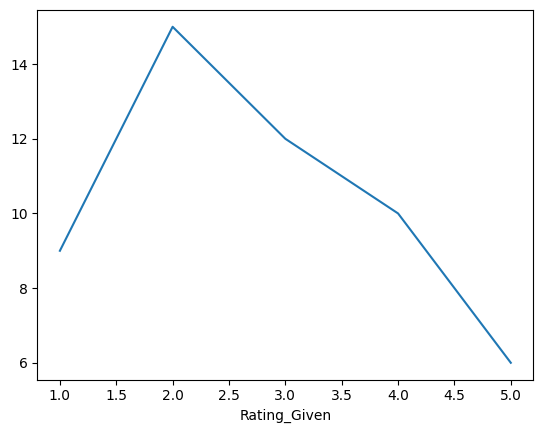

In [20]:
# Rating_Given Metric for Churned Users (Dissatisfied with content) 

max_rating = churned_df[churned_df['Reason_for_Churn'] == 'Dissatisfied with content'][churned_df['Rating_Given'] >= 4]['User_ID'].count()
min_rating = churned_df[churned_df['Reason_for_Churn'] == 'Dissatisfied with content'][churned_df['Rating_Given'] <= 2]['User_ID'].count()

print(max_rating)
print(min_rating)

churned_df[churned_df['Reason_for_Churn'] == 'Dissatisfied with content'].groupby('Rating_Given')['User_ID'].count().plot()

In [21]:
# Rating_Given Metric based on Content 

overall_rating = churned_df.groupby('Rating_Given')['User_ID'].count()
churn_watched_content = churned_df.groupby('Content_ID')['User_ID'].count()
content_based_rating = streamflow_df.groupby(['Content_ID','Rating_Given'])['User_ID'].count()

print(overall_rating)
print(churn_watched_content)
print(content_based_rating)

Rating_Given
1    58
2    70
3    57
4    36
5    25
Name: User_ID, dtype: int64
Content_ID
1000    2
1001    2
1002    2
1003    1
1004    4
       ..
1095    6
1096    3
1097    2
1098    2
1099    4
Name: User_ID, Length: 94, dtype: int64
Content_ID  Rating_Given
1000        1               1
            2               1
            3               1
            4               1
            5               2
                           ..
1099        1               3
            2               3
            3               1
            4               1
            5               2
Name: User_ID, Length: 441, dtype: int64


Content_ID
1000    1
1001    1
1002    1
1004    2
1005    4
       ..
1095    3
1096    1
1097    1
1098    2
1099    3
Name: User_ID, Length: 74, dtype: int64


<Axes: xlabel='Content_ID'>

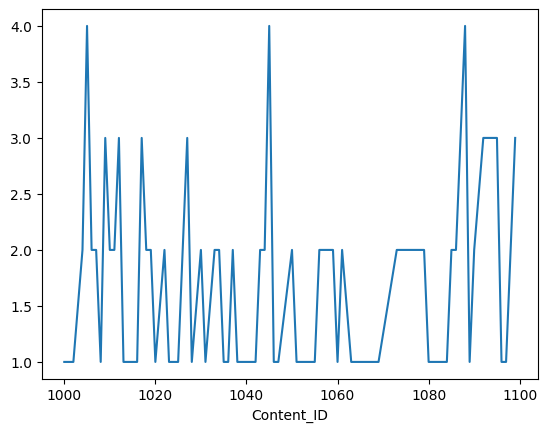

In [22]:
churn_min_rating = churned_df[churned_df['Rating_Given'] <= 2].groupby('Content_ID')['User_ID'].count()
print(churn_min_rating)
churn_min_rating.plot()

In [23]:
churned_df[churned_df['Rating_Given'] <= 2].groupby('Content_ID')['User_ID'].sum()

Content_ID
1000     860
1001     753
1002     846
1004    1474
1005    1322
        ... 
1095    1574
1096     381
1097     119
1098    1613
1099    1841
Name: User_ID, Length: 74, dtype: int64

# Creating New Metrics for Data Analysis

In [24]:
# Creating a Mean Rating Column based on Content ID

mean_rating = streamflow_df.groupby('Content_ID')['Rating_Given'].mean().to_dict()

streamflow_df['Mean_rating'] = streamflow_df['Content_ID'].map(mean_rating)
streamflow_df

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Mean_rating
0,1,56,Other,Central,2020-06-07,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaT,NaN,3.250000
1,2,69,Other,West,2024-02-21,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaT,NaN,2.909091
2,3,46,Female,North,2022-10-06,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaT,NaN,2.727273
3,4,32,Female,East,2022-01-04,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaT,NaN,3.111111
4,5,60,Female,North,2020-03-13,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaT,NaN,3.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26,Basic,9.99,PayPal,0.700179,Documentary,Mobile,3.310731,1035,1,1,2021-03-14,Found better service,3.571429
996,997,66,Female,West,2020-05-06,Standard,14.99,Credit Card,20.153308,Action,Mobile,3.222521,1069,4,0,NaT,NaN,2.666667
997,998,52,Other,South,2019-06-19,Standard,14.99,PayPal,39.170314,Drama,PC,1.221380,1079,1,0,NaT,NaN,2.454545
998,999,69,Male,East,2020-11-13,Standard,14.99,Credit Card,8.455372,Sci-Fi,Mobile,1.865411,1092,2,1,2021-04-05,Found better service,3.000000


In [25]:
# Total Monthly Hours Column based on Content ID

total_monthly_hours_watched = streamflow_df.groupby('Content_ID')['Monthly_Hours_Watched'].sum().to_dict()
streamflow_df['Total_Monthly_Hours'] = streamflow_df['Content_ID'].map(total_monthly_hours_watched)

streamflow_df

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Mean_rating,Total_Monthly_Hours
0,1,56,Other,Central,2020-06-07,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaT,NaN,3.250000,299.728259
1,2,69,Other,West,2024-02-21,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaT,NaN,2.909091,210.622069
2,3,46,Female,North,2022-10-06,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaT,NaN,2.727273,161.813504
3,4,32,Female,East,2022-01-04,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaT,NaN,3.111111,226.511191
4,5,60,Female,North,2020-03-13,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaT,NaN,3.150000,489.796078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26,Basic,9.99,PayPal,0.700179,Documentary,Mobile,3.310731,1035,1,1,2021-03-14,Found better service,3.571429,77.003141
996,997,66,Female,West,2020-05-06,Standard,14.99,Credit Card,20.153308,Action,Mobile,3.222521,1069,4,0,NaT,NaN,2.666667,207.010089
997,998,52,Other,South,2019-06-19,Standard,14.99,PayPal,39.170314,Drama,PC,1.221380,1079,1,0,NaT,NaN,2.454545,244.627516
998,999,69,Male,East,2020-11-13,Standard,14.99,Credit Card,8.455372,Sci-Fi,Mobile,1.865411,1092,2,1,2021-04-05,Found better service,3.000000,136.370191


In [26]:
# Mean Values tracked for Rating and Total Monthly Hours
mean_total_monthly_hours = streamflow_df['Total_Monthly_Hours'].mean()
mean_rating = streamflow_df['Mean_rating'].mean()

print('Mean Total Monthly Hours:', mean_total_monthly_hours)
print('Mean Rating:', mean_rating)

Mean Total Monthly Hours: 211.77394323656299
Mean Rating: 3.03


In [27]:
# Creating a Metric based on  Mean Rating and Total Monthly Hours for Dissatisfied with content Metric
# Considering Total_Monthly_Hours > Mean(Total_Monthly_Hours) and Mean_Rating > 3.5 (To define excellent show choices)

def drop_content_id(row):
    if row['Mean_rating'] >= 3.5 and row['Total_Monthly_Hours'] >= 211.77:
        return 'Excellent Show Choice,2'
    elif row['Mean_rating'] >= 3.5 and row['Total_Monthly_Hours'] < 211.77:
        return 'Moderate Show Choice,1'
    elif row['Mean_rating'] < 3.5 and row['Total_Monthly_Hours'] >= 211.77:
        return 'Moderate Show Choice,1'
    elif row['Mean_rating'] < 3.5 and row['Total_Monthly_Hours'] < 211.77:
        return 'Bad Show Choice,0'

streamflow_df['Show_Rating_Metric'] = streamflow_df.apply(drop_content_id, axis = 1)

streamflow_df

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Mean_rating,Total_Monthly_Hours,Show_Rating_Metric
0,1,56,Other,Central,2020-06-07,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaT,NaN,3.250000,299.728259,"Moderate Show Choice,1"
1,2,69,Other,West,2024-02-21,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaT,NaN,2.909091,210.622069,"Bad Show Choice,0"
2,3,46,Female,North,2022-10-06,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaT,NaN,2.727273,161.813504,"Bad Show Choice,0"
3,4,32,Female,East,2022-01-04,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaT,NaN,3.111111,226.511191,"Moderate Show Choice,1"
4,5,60,Female,North,2020-03-13,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaT,NaN,3.150000,489.796078,"Moderate Show Choice,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26,Basic,9.99,PayPal,0.700179,Documentary,Mobile,3.310731,1035,1,1,2021-03-14,Found better service,3.571429,77.003141,"Moderate Show Choice,1"
996,997,66,Female,West,2020-05-06,Standard,14.99,Credit Card,20.153308,Action,Mobile,3.222521,1069,4,0,NaT,NaN,2.666667,207.010089,"Bad Show Choice,0"
997,998,52,Other,South,2019-06-19,Standard,14.99,PayPal,39.170314,Drama,PC,1.221380,1079,1,0,NaT,NaN,2.454545,244.627516,"Moderate Show Choice,1"
998,999,69,Male,East,2020-11-13,Standard,14.99,Credit Card,8.455372,Sci-Fi,Mobile,1.865411,1092,2,1,2021-04-05,Found better service,3.000000,136.370191,"Bad Show Choice,0"


In [28]:
#Splitting the data into 2 columns (Show_Rating_Metric, Rating_Metric)

streamflow_df[['Show_Rating_Metric', 'Rating_Metric']] = streamflow_df['Show_Rating_Metric'].str.split(",", expand=True)
streamflow_df

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,...,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Mean_rating,Total_Monthly_Hours,Show_Rating_Metric,Rating_Metric
0,1,56,Other,Central,2020-06-07,Premium,19.99,Credit Card,31.513153,Action,...,1.195762,1023,5,0,NaT,NaN,3.250000,299.728259,Moderate Show Choice,1
1,2,69,Other,West,2024-02-21,Standard,14.99,Credit Card,4.982277,Drama,...,0.809002,1076,1,0,NaT,NaN,2.909091,210.622069,Bad Show Choice,0
2,3,46,Female,North,2022-10-06,Standard,14.99,PayPal,4.114953,Sci-Fi,...,1.153570,1095,2,0,NaT,NaN,2.727273,161.813504,Bad Show Choice,0
3,4,32,Female,East,2022-01-04,Standard,14.99,Credit Card,60.244820,Action,...,0.609503,1003,1,0,NaT,NaN,3.111111,226.511191,Moderate Show Choice,1
4,5,60,Female,North,2020-03-13,Standard,14.99,Credit Card,4.711855,Sci-Fi,...,0.359971,1012,4,0,NaT,NaN,3.150000,489.796078,Moderate Show Choice,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26,Basic,9.99,PayPal,0.700179,Documentary,...,3.310731,1035,1,1,2021-03-14,Found better service,3.571429,77.003141,Moderate Show Choice,1
996,997,66,Female,West,2020-05-06,Standard,14.99,Credit Card,20.153308,Action,...,3.222521,1069,4,0,NaT,NaN,2.666667,207.010089,Bad Show Choice,0
997,998,52,Other,South,2019-06-19,Standard,14.99,PayPal,39.170314,Drama,...,1.221380,1079,1,0,NaT,NaN,2.454545,244.627516,Moderate Show Choice,1
998,999,69,Male,East,2020-11-13,Standard,14.99,Credit Card,8.455372,Sci-Fi,...,1.865411,1092,2,1,2021-04-05,Found better service,3.000000,136.370191,Bad Show Choice,0


Show_Rating_Metric
Bad Show Choice          452
Excellent Show Choice     66
Moderate Show Choice     482
Name: User_ID, dtype: int64


Text(0.5, 1.0, 'Show Rating Metric')

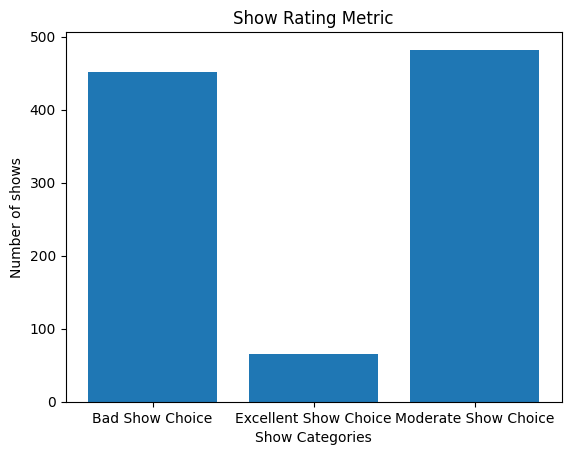

In [29]:
#Plotting the values for the new Show_Rating_Metric

show_choice = streamflow_df.groupby('Show_Rating_Metric')['User_ID'].count()
print(show_choice)

show_categories = ['Bad Show Choice', 'Excellent Show Choice', 'Moderate Show Choice']
plt.bar(show_categories, height = show_choice)

plt.xlabel("Show Categories")
plt.ylabel("Number of shows")
plt.title("Show Rating Metric")

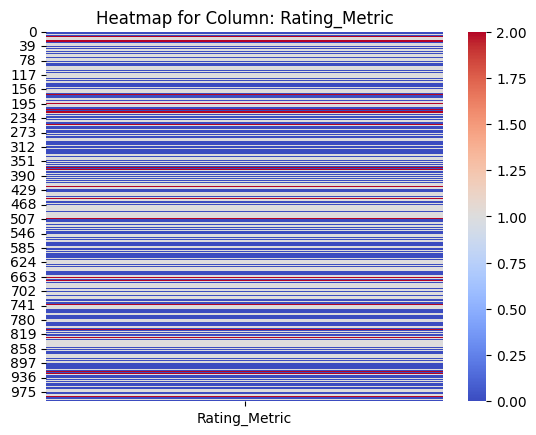

In [30]:
# Heatmap for Rating_Metric based on Content ID

le = LabelEncoder()
streamflow_df['Rating_Metric'] = le.fit_transform(streamflow_df['Rating_Metric'])

filtered_df = streamflow_df[streamflow_df['Rating_Metric'].notna()]

filtered_df
sns.heatmap(filtered_df[['Rating_Metric']], cmap="coolwarm")
plt.title("Heatmap for Column: " + 'Rating_Metric')
plt.show()

In [31]:
#Count for Churned vs Churned(Dissatisfied with content) based on Show Rating Metric

churned_show_rating = streamflow_df[streamflow_df['Churned'] == 1].groupby('Show_Rating_Metric')['User_ID'].count()
churn_dissatisfied = streamflow_df[streamflow_df['Reason_for_Churn'] == 'Dissatisfied with content'].groupby('Show_Rating_Metric')['User_ID'].count()

print(churned_show_rating)
print(churn_dissatisfied)

Show_Rating_Metric
Bad Show Choice          122
Excellent Show Choice     14
Moderate Show Choice     110
Name: User_ID, dtype: int64
Show_Rating_Metric
Bad Show Choice          27
Excellent Show Choice     2
Moderate Show Choice     23
Name: User_ID, dtype: int64


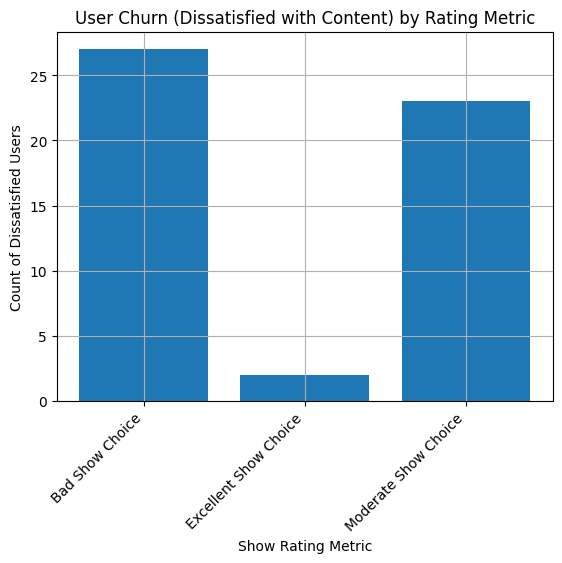

In [32]:
# Plot values for Show rating Metric for Churned Users(Dissatisfied with content)

dissatisfied_churn = streamflow_df[streamflow_df['Reason_for_Churn'] == 'Dissatisfied with content']

user_count_by_rating = dissatisfied_churn.groupby('Show_Rating_Metric')['User_ID'].count()

plt.bar(user_count_by_rating.index, user_count_by_rating.values)

plt.xlabel("Show Rating Metric")
plt.ylabel("Count of Dissatisfied Users")
plt.title("User Churn (Dissatisfied with Content) by Rating Metric")
plt.xticks(rotation=45, ha="right")
plt.grid(True)

plt.show()

In [33]:
# Genre relation with Total vs Churned Users

fav_genre_showrating = streamflow_df.groupby(['Favorite_Genre','Show_Rating_Metric'])['User_ID'].count()
churn_fav_genre_showrating = streamflow_df[streamflow_df['Churned'] == 1].groupby(['Favorite_Genre','Show_Rating_Metric'])['User_ID'].count()

print(fav_genre_showrating)
print(churn_fav_genre_showrating)

Favorite_Genre  Show_Rating_Metric   
Action          Bad Show Choice          104
                Excellent Show Choice     11
                Moderate Show Choice      90
Comedy          Bad Show Choice           94
                Excellent Show Choice     13
                Moderate Show Choice      96
Documentary     Bad Show Choice           81
                Excellent Show Choice     17
                Moderate Show Choice      90
Drama           Bad Show Choice           91
                Excellent Show Choice     12
                Moderate Show Choice     109
Sci-Fi          Bad Show Choice           82
                Excellent Show Choice     13
                Moderate Show Choice      97
Name: User_ID, dtype: int64
Favorite_Genre  Show_Rating_Metric   
Action          Bad Show Choice          29
                Excellent Show Choice     2
                Moderate Show Choice     18
Comedy          Bad Show Choice          24
                Excellent Show Choice     4
 

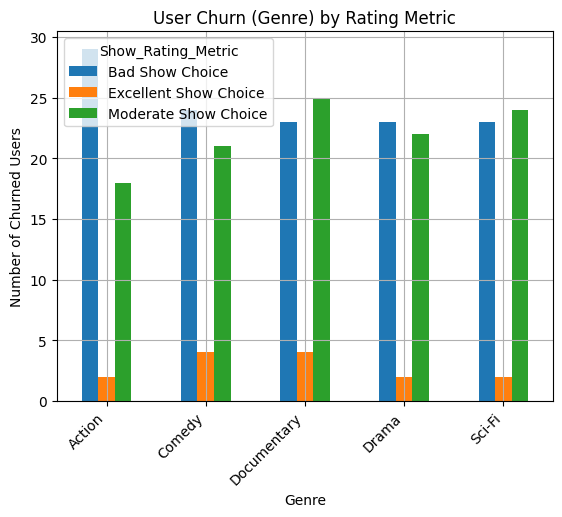

In [34]:
# Plot for Favourite Genre based on Churned Users

churned_data = streamflow_df[streamflow_df['Churned'] == 1]

genre_rating = churned_data.groupby(['Favorite_Genre','Show_Rating_Metric'])['User_ID'].count()

genre_rating = genre_rating.unstack()

genre_rating.plot(kind = 'bar', stacked = False)

plt.xlabel("Genre")
plt.ylabel("Number of Churned Users")
plt.title("User Churn (Genre) by Rating Metric")
plt.xticks(rotation=45, ha="right")
plt.grid(True)

plt.show()

In [35]:
#Monthly and Subscription prices for Price Increased Customers
price_sub_payment = streamflow_df[streamflow_df['Reason_for_Churn'] == 'Price increase'].groupby(['Subscription_Type','Monthly_Payment'])['User_ID'].count()

# Devices Used by Churned Users
churn_devices = streamflow_df[streamflow_df['Churned'] == 1].groupby('Devices_Used')['User_ID'].count()

print(price_sub_payment)
print(churn_devices)

Subscription_Type  Monthly_Payment
Basic              9.99               15
Premium            19.99              18
Standard           14.99              35
Name: User_ID, dtype: int64
Devices_Used
Mobile    131
PC         27
TV         44
Tablet     44
Name: User_ID, dtype: int64


Devices_Used
Mobile    32
PC        10
TV         9
Tablet    17
Name: User_ID, dtype: int64


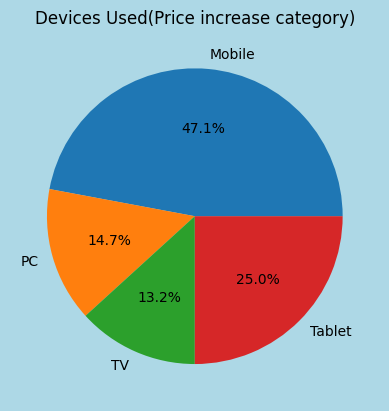

In [36]:
#Plot for Devices Used for Price Increased Customers

used_device = streamflow_df[streamflow_df['Reason_for_Churn'] == 'Price increase'].groupby('Devices_Used')['User_ID'].count()
print(used_device)

plt.pie(used_device, labels=used_device.index, autopct="%1.1f%%")

plt.title("Devices Used(Price increase category)")
plt.gcf().set_facecolor('lightblue')
plt.show()

In [37]:
# Devicing a New Metric to Understand Price Increased Customers
# Price Increase >> Device_Used + Subscription_Type

# New Device Mewtric Based on the Size of the Device
large_device = ['TV', 'PC']
small_device = ['Mobile', 'Tablet']

def device_size(row):
    if row['Devices_Used'] in large_device:
        return 'Large Device'
    elif row['Devices_Used'] in small_device:
        return 'Small Device'

streamflow_df['Device Size'] = streamflow_df.apply(device_size, axis = 1)

# New Proposed Price metric(Subscription Type) based on Size of Device
def price_range(row):
    if row['Device Size'] == 'Large Device' and row['Subscription_Type'] != 'Basic':
        return 'Same price'
    elif row['Device Size'] == 'Small Device' and row['Subscription_Type'] != 'Basic':
        return 'Reduce price'
    elif row['Subscription_Type'] == 'Basic':
        return 'Same Basic Price'

streamflow_df['Price Package'] = streamflow_df.apply(price_range, axis = 1)
streamflow_df

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,...,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Mean_rating,Total_Monthly_Hours,Show_Rating_Metric,Rating_Metric,Device Size,Price Package
0,1,56,Other,Central,2020-06-07,Premium,19.99,Credit Card,31.513153,Action,...,5,0,NaT,NaN,3.250000,299.728259,Moderate Show Choice,1,Large Device,Same price
1,2,69,Other,West,2024-02-21,Standard,14.99,Credit Card,4.982277,Drama,...,1,0,NaT,NaN,2.909091,210.622069,Bad Show Choice,0,Large Device,Same price
2,3,46,Female,North,2022-10-06,Standard,14.99,PayPal,4.114953,Sci-Fi,...,2,0,NaT,NaN,2.727273,161.813504,Bad Show Choice,0,Small Device,Reduce price
3,4,32,Female,East,2022-01-04,Standard,14.99,Credit Card,60.244820,Action,...,1,0,NaT,NaN,3.111111,226.511191,Moderate Show Choice,1,Large Device,Same price
4,5,60,Female,North,2020-03-13,Standard,14.99,Credit Card,4.711855,Sci-Fi,...,4,0,NaT,NaN,3.150000,489.796078,Moderate Show Choice,1,Small Device,Reduce price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26,Basic,9.99,PayPal,0.700179,Documentary,...,1,1,2021-03-14,Found better service,3.571429,77.003141,Moderate Show Choice,1,Small Device,Same Basic Price
996,997,66,Female,West,2020-05-06,Standard,14.99,Credit Card,20.153308,Action,...,4,0,NaT,NaN,2.666667,207.010089,Bad Show Choice,0,Small Device,Reduce price
997,998,52,Other,South,2019-06-19,Standard,14.99,PayPal,39.170314,Drama,...,1,0,NaT,NaN,2.454545,244.627516,Moderate Show Choice,1,Large Device,Same price
998,999,69,Male,East,2020-11-13,Standard,14.99,Credit Card,8.455372,Sci-Fi,...,2,1,2021-04-05,Found better service,3.000000,136.370191,Bad Show Choice,0,Small Device,Reduce price


In [38]:
# Proposed Price package variation for Price Increased Customers

streamflow_df[streamflow_df['Reason_for_Churn'] == 'Price increase'].groupby('Price Package')['User_ID'].count()

Price Package
Reduce price        38
Same Basic Price    15
Same price          15
Name: User_ID, dtype: int64

In [39]:
price_churned_users = streamflow_df[streamflow_df['Churned'] == 1].groupby('Price Package')['User_ID'].count()
price_nonchurned_users = streamflow_df[streamflow_df['Churned'] == 0].groupby('Price Package')['User_ID'].count()

print(price_churned_users)
print(price_nonchurned_users)

Price Package
Reduce price        126
Same Basic Price     73
Same price           47
Name: User_ID, dtype: int64
Price Package
Reduce price        322
Same Basic Price    203
Same price          229
Name: User_ID, dtype: int64


Device Size
Large Device     71
Small Device    175
Name: User_ID, dtype: int64


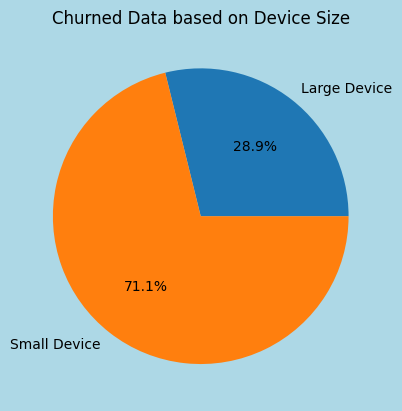

In [40]:
#Size of the Device Metric for Churned Users

churned_data = streamflow_df[streamflow_df['Churned'] == 1]

size_device = churned_data.groupby('Device Size')['User_ID'].count()
print(size_device)

plt.pie(size_device, labels=size_device.index, autopct="%1.1f%%")

plt.title("Churned Data based on Device Size")
plt.gcf().set_facecolor('lightblue')
plt.show()

In [41]:
churn_payment_mean = streamflow_df[streamflow_df['Churned'] == 1]['Monthly_Payment'].mean()
nonchurn_payment_mean = streamflow_df[streamflow_df['Churned'] == 0]['Monthly_Payment'].mean()

print(churn_payment_mean)
print(nonchurn_payment_mean)

14.502195121951221
14.605384615384613
